In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import rgb2hex, hex2color, CSS4_COLORS
from skimage.color import rgb2lab, lab2rgb

In [2]:
honni = plt.imread("honni.png")[:,:, :3]
kirschi = plt.imread("kirschi.png")[:,:, :3]

In [3]:
# cropping rectangle
t, b = 170, 200
l, r = 70, 180

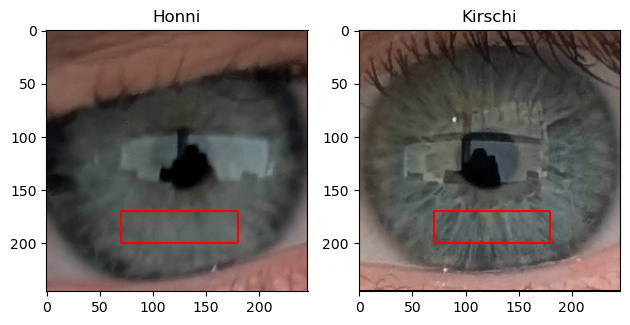

In [4]:
plt.figure()

plt.subplot(1, 2, 1)
plt.title('Honni')
plt.imshow(honni)
plt.vlines([l, r], t, b, color='red')
plt.hlines([t, b], l, r, color='red')

plt.subplot(1, 2, 2)
plt.title('Kirschi')
plt.imshow(kirschi)
plt.vlines([l, r], t, b, color='red')
plt.hlines([t, b], l, r, color='red')

plt.tight_layout()
plt.show()

In [5]:
honni_slice = honni[t:b, l:r]
kirschi_slice = kirschi[t:b, l:r]

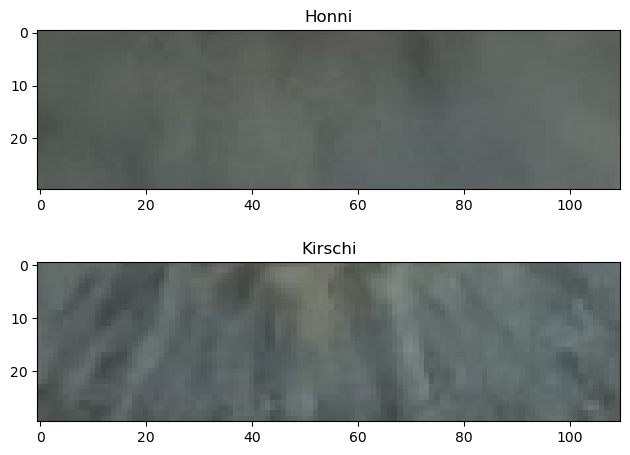

In [6]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Honni')
plt.imshow(honni_slice)
plt.subplot(2, 1, 2)
plt.title('Kirschi')
plt.imshow(kirschi_slice)
plt.tight_layout()
plt.show()

In [7]:
honni_colour = lab2rgb(np.mean(rgb2lab(honni_slice), axis=(0, 1)))
kirschi_colour = lab2rgb(np.mean(rgb2lab(kirschi_slice), axis=(0, 1)))
delta_colour = lab2rgb(rgb2lab(kirschi_colour) - rgb2lab(honni_colour))

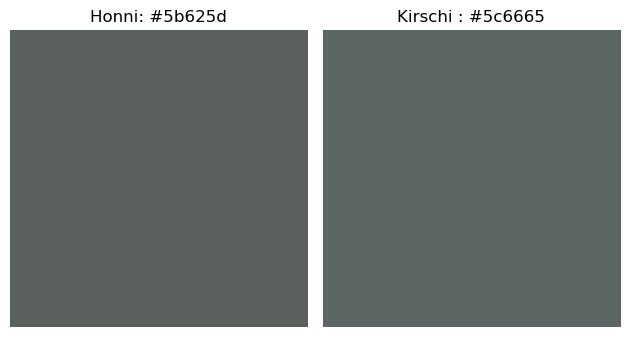

In [8]:
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Honni: ' + rgb2hex(honni_colour))
plt.axis('off')
plt.imshow(honni_colour[None, None])
plt.subplot(1, 2, 2)
plt.title('Kirschi : ' + rgb2hex(kirschi_colour))
plt.axis('off')
plt.imshow(kirschi_colour[None, None])
plt.tight_layout()
plt.show()

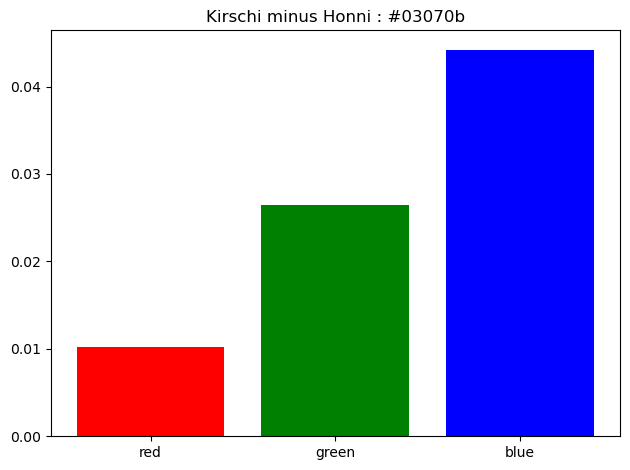

In [9]:
plt.figure()
plt.title('Kirschi minus Honni : ' + rgb2hex(delta_colour))
plt.bar(['red', 'green', 'blue'], delta_colour, color=['r', 'g', 'b'])
plt.tight_layout()
plt.show()

In [10]:
print('Established colour names:')
CSS4_COLORS

Established colour names:


{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [11]:
def colour_distance(rgb1, rgb2):
    # use CIE 1976 L*a*b* colour space
    lab1 = rgb2lab(rgb1)
    lab2 = rgb2lab(rgb2)

    for lab in [lab1, lab2]:
        lightness = np.clip(lab[..., 0], 1e-10, None)
        chroma = np.linalg.norm(lab[..., 1:])
        saturation = 100 * chroma / lightness
        lab[..., 0] = saturation 

    return np.linalg.norm(lab2 - lab1, axis=-1)


def top_k_colour_matches(colour, k):
    differences = {
        k: colour_distance(colour, np.array(hex2color(c)))
        for k, c in CSS4_COLORS.items()
        if 'gray' not in k  # exclude American spelling
    }
    colour_ranking = sorted(differences.items(), key=lambda x: x[1])
    return [k for k, _ in colour_ranking[:k]]

In [12]:
print('Honni\'s 10 closest eye colours:\n')
print(*top_k_colour_matches(honni_colour, k=10), sep='\n')

Honni's 10 closest eye colours:

mintcream
honeydew
azure
ivory
floralwhite
linen
oldlace
seashell
aliceblue
lightcyan


In [13]:
print('Kirschi\'s 10 closest eye colours:\n')
print(*top_k_colour_matches(kirschi_colour, k=10), sep='\n')

Kirschi's 10 closest eye colours:

azure
mintcream
lightcyan
aliceblue
honeydew
ivory
floralwhite
ghostwhite
seashell
linen
